# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
# path = 'C:/Users/User/project/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [4]:
# !pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.

import scipy.stats as spst

### (3) 데이터 불러오기
* **세부 요구사항**
    - 전처리 단계에서 저장한 파일을 불러옵니다. data1.pkl

In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

data = joblib.load('./data1.pkl')

In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.head()


,Date,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),TaxiCount,Reservation,RidingCount,...,DistanceAvg,Year,Month,Day,Week,WeekDay,Season,holiday,WaitingTime(7days),RidingPercent
0,2015-01-02,-4.3,-9.8,0.0,52.0,33.0,9.79,213,1023,924,...,10764,2015,1,2,1,Friday,Winter,0,23.371429,90.322581
1,2015-01-03,-2.0,-8.9,0.0,63.0,28.0,9.07,420,3158,2839,...,8611,2015,1,3,1,Saturday,Winter,0,23.371429,89.898670
2,2015-01-04,2.4,-9.2,0.0,73.0,37.0,8.66,209,1648,1514,...,10198,2015,1,4,1,Sunday,Winter,0,23.371429,91.868932
3,2015-01-05,8.2,0.2,0.0,89.0,58.0,5.32,196,1646,1526,...,10955,2015,1,5,2,Monday,Winter,0,23.371429,92.709599
4,2015-01-06,7.9,-0.9,0.0,95.0,52.0,6.48,421,4250,3730,...,8663,2015,1,6,2,Tuesday,Winter,0,23.371429,87.764706


In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [9]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [10]:
# 숫자형 변수 분석
def eda_1_n(data, var, hue_var = ''):
    display(data[[var]].describe().T)

    if hue_var == '' :
        plt.figure(figsize = (15,10))
        plt.subplot(2,1,1)
        sns.histplot(data[var], kde = True, bins = 50)
        # sns.histplot(data[var], kde = True, bins = max(data[var]) - min(data[var]))
        plt.grid()

        plt.subplot(2,1,2)
        sns.boxplot(x = data[var])
        plt.grid()
        plt.show()
    else :
        plt.figure(figsize = (15,5))
        plt.subplot(1,2,1)
        sns.kdeplot(x= var, data = data, hue = hue_var)
        plt.grid()

        plt.subplot(1,2,2)
        sns.boxplot(x = hue_var, y = var, data = data)
        plt.grid()


In [11]:
# 범주형 변수 분석
def eda_1_c(data, var, hue_var = ''):

    cnt = data[var].value_counts()
    prop = data[var].value_counts()/data.shape[0]
    result = pd.DataFrame({'Count':cnt, 'Prop':prop})
    display(result)

    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

#### 1) 접수건

,count,mean,std,min,25%,50%,75%,max
Reservation,2922.0,3925.959959,1509.45135,527.0,2162.5,4720.5,5110.0,6182.0


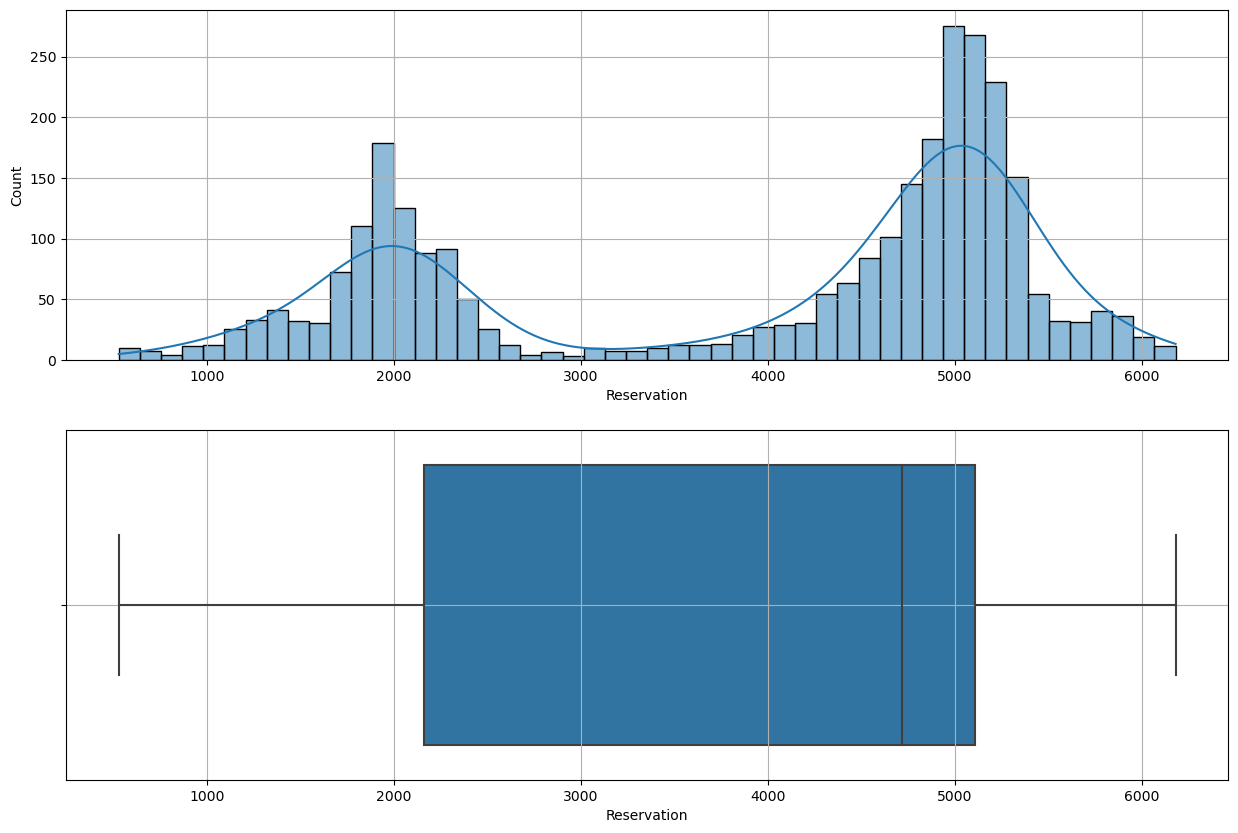

In [12]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n(data, 'Reservation')

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [14]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [15]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 2) 평균대기시간

,count,mean,std,min,25%,50%,75%,max
WaitingTime,2922.0,40.306023,14.098147,17.2,29.6,38.2,48.6,96.1


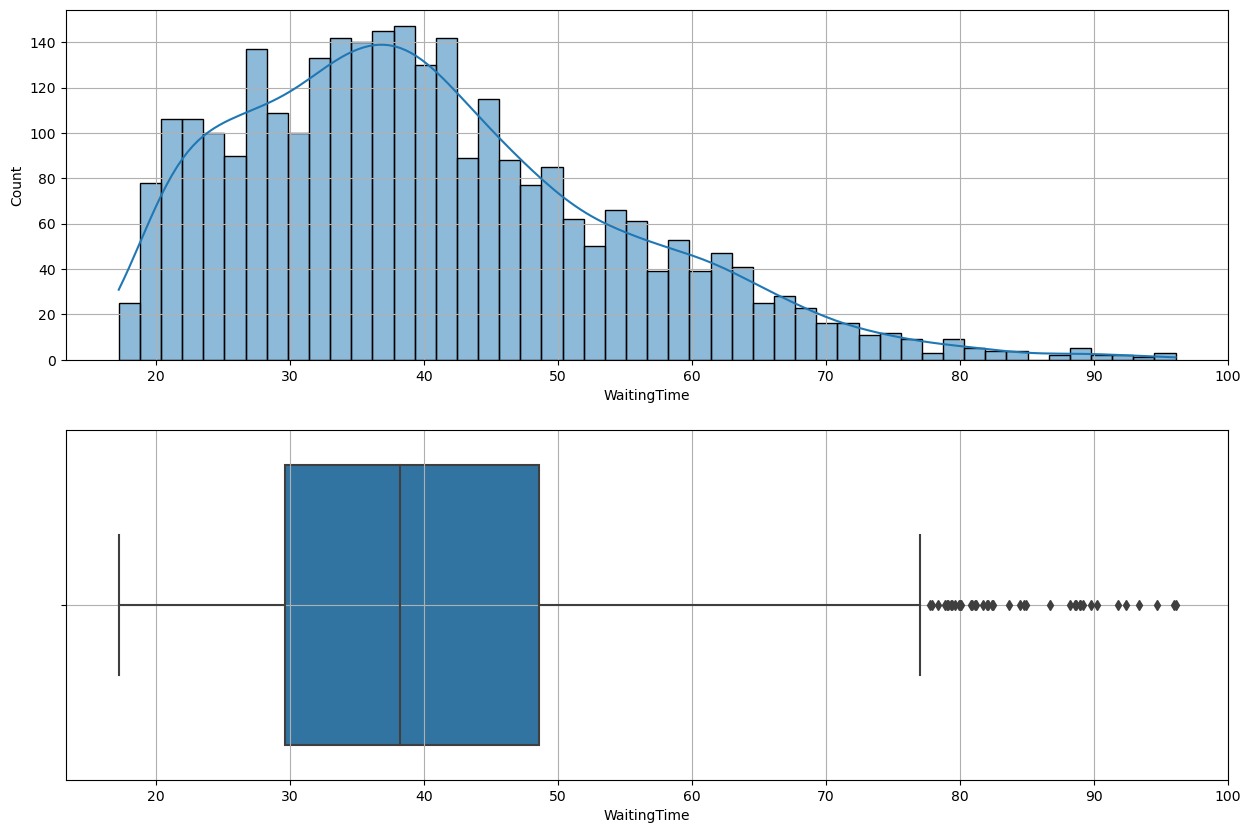

In [16]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n(data, 'WaitingTime')

In [17]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [18]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 3) 평균운임

,count,mean,std,min,25%,50%,75%,max
FareAvg,2922.0,2304.30219,107.275966,2131.0,2228.0,2257.0,2401.0,2733.0


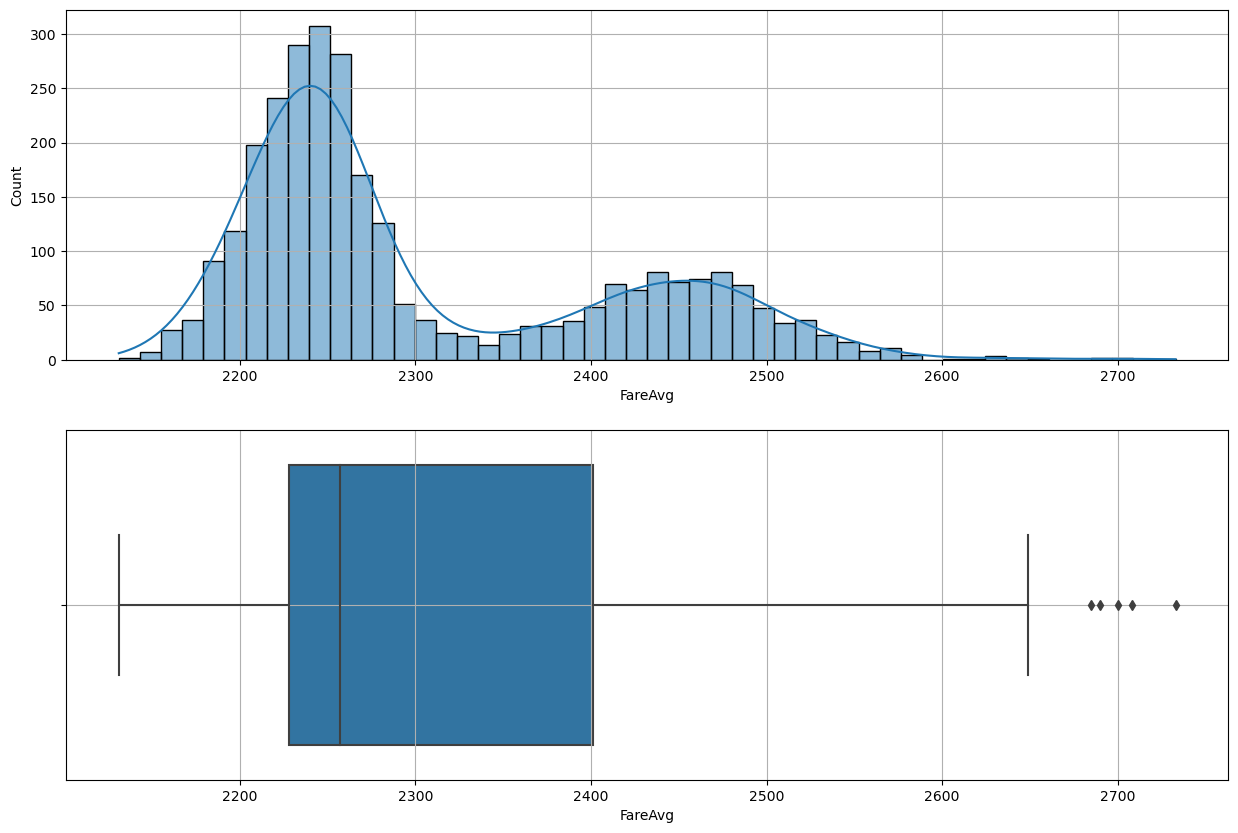

In [20]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n(data, 'FareAvg')

In [21]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [22]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [23]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 4) 평균거리

,count,mean,std,min,25%,50%,75%,max
DistanceAvg,2922.0,9253.741958,1019.325168,7672.0,8521.0,8821.5,10153.0,14136.0


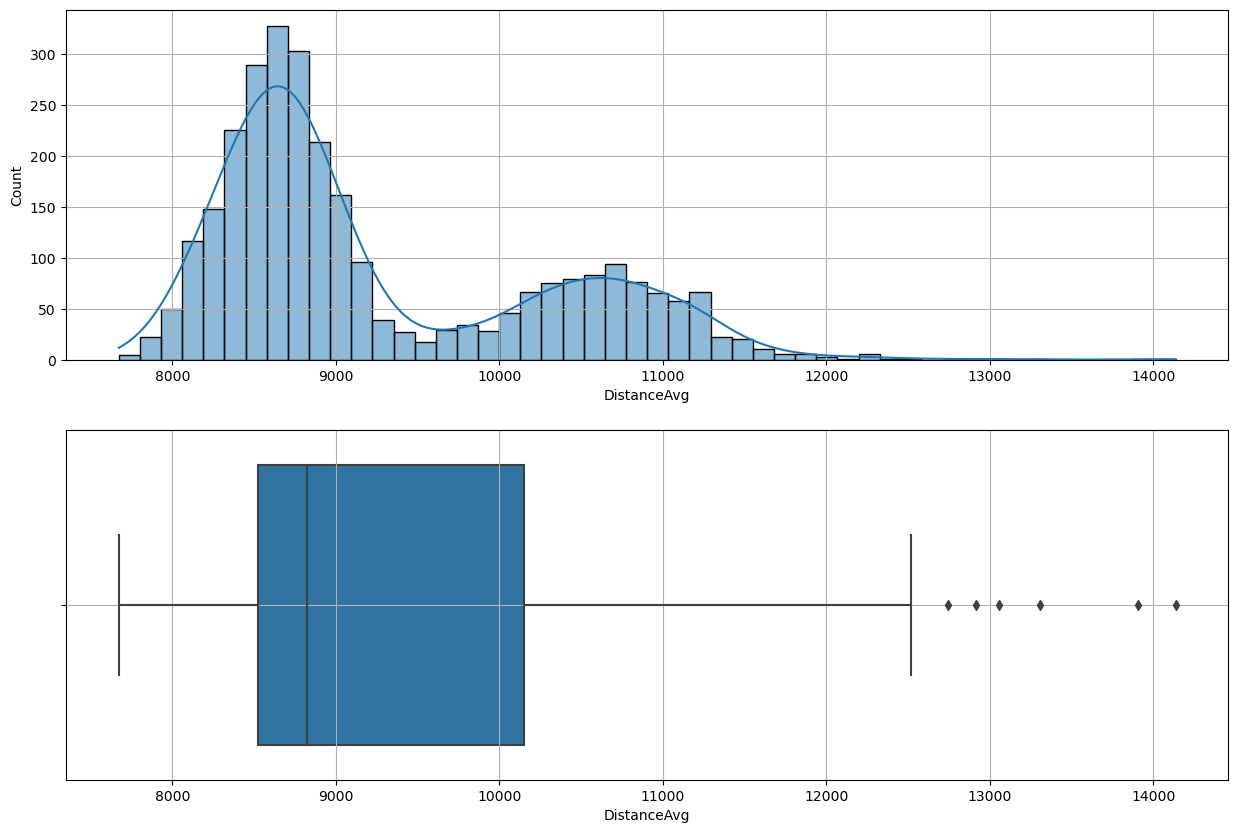

In [24]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n(data, 'DistanceAvg')

In [25]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [26]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [27]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [28]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 5) 탑승률

,count,mean,std,min,25%,50%,75%,max
RidingPercent,2922.0,84.149585,5.236761,59.699625,80.591752,84.561544,87.772009,96.884422


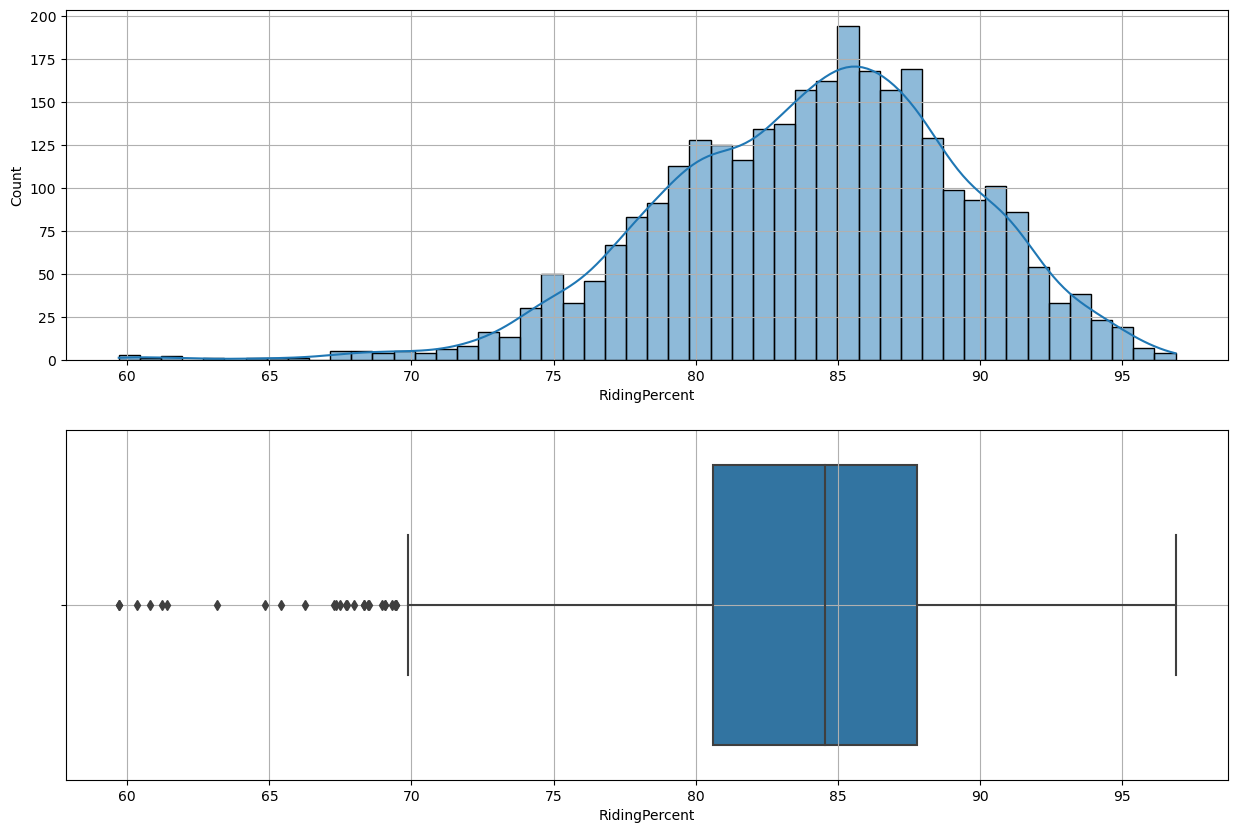

In [29]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n(data, 'RidingPercent')

In [30]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [31]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [32]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 6) 최고기온(°C)

,count,mean,std,min,25%,50%,75%,max
temp_max,2922.0,18.081177,10.706657,-11.2,9.0,19.7,27.4,39.4


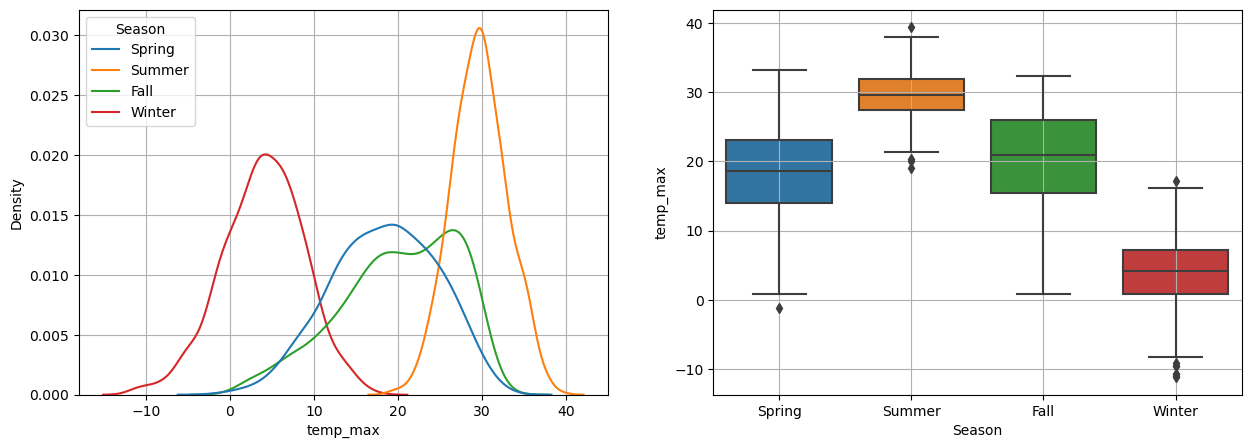

In [33]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n(data, 'temp_max', 'Season')

In [34]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [35]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [36]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [37]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



#### 7) 일강수량(mm)

,count,mean,std,min,25%,50%,75%,max
rain(mm),2922.0,3.356468,12.595661,0.0,0.0,0.0,0.3,178.9


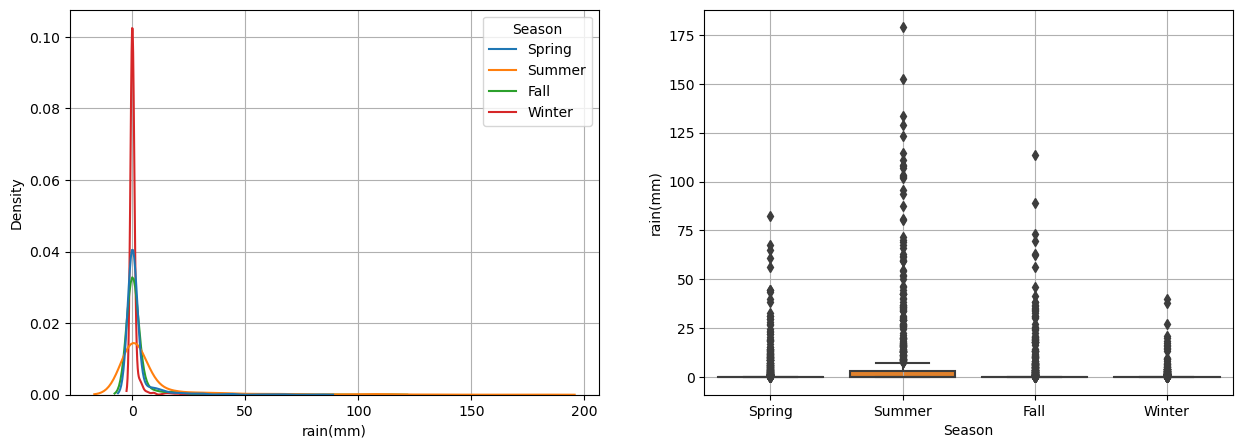

In [38]:
eda_1_n(data, 'rain(mm)', 'Season')

,count,mean,std,min,25%,50%,75%,max
rain(mm),2922.0,3.356468,12.595661,0.0,0.0,0.0,0.3,178.9


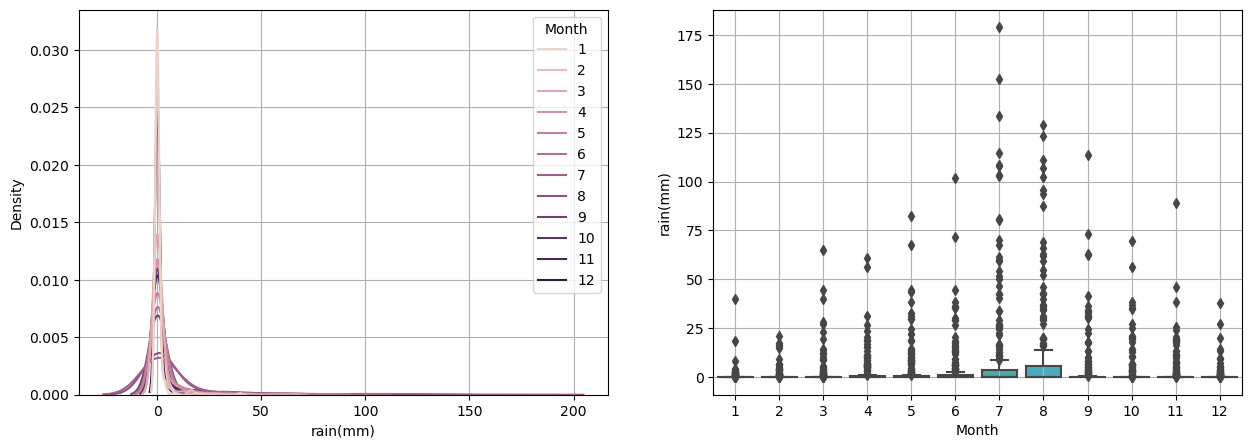

In [39]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n(data, 'rain(mm)', 'Month')

In [40]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [41]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [42]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

#### 1) 공휴일 유무

,Count,Prop
holiday,,
0,2803,0.959274
1,119,0.040726


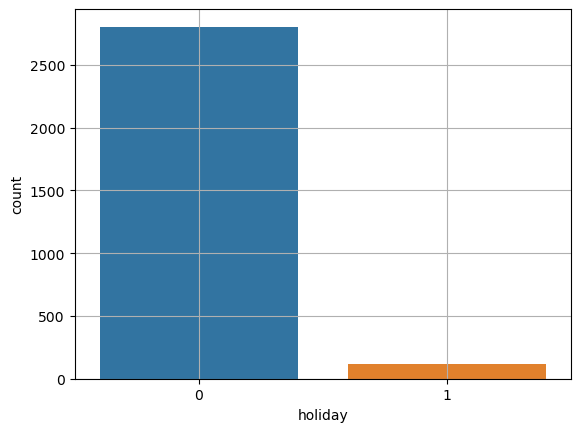

In [43]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_c(data, 'holiday')

,Count,Prop
Season,,
Spring,736,0.251882
Summer,736,0.251882
Fall,729,0.249487
Winter,721,0.246749


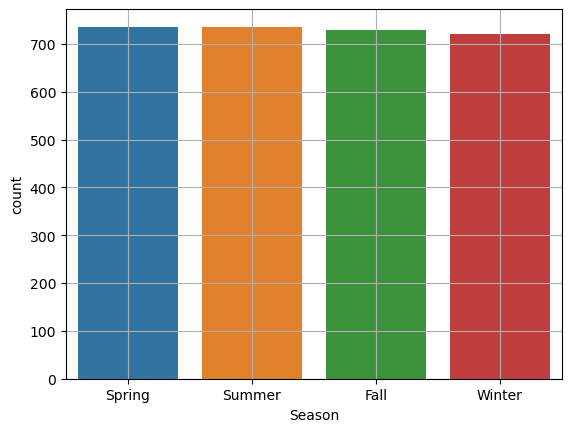

In [44]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_c(data, 'Season')

,Count,Prop
WeekDay,,
Tuesday,418,0.143053
Friday,418,0.143053
Saturday,418,0.143053
Monday,417,0.142710
Wednesday,417,0.142710
Thursday,417,0.142710
Sunday,417,0.142710


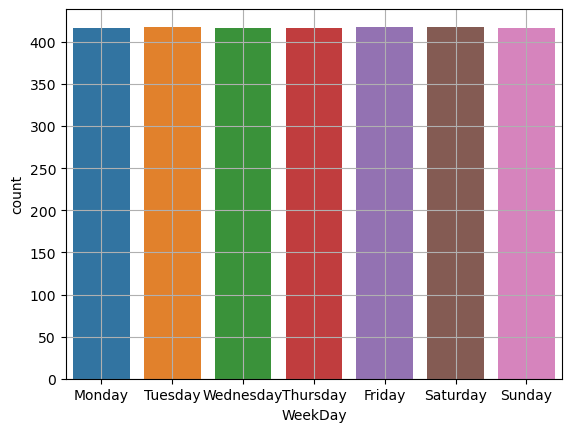

In [45]:
eda_1_c(data, 'WeekDay')

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

In [46]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

#### 1) 전체 상관계수 시각화

In [47]:
# 전체 상관관계를 한눈에 보여주기 함수
def eda_2_corr(data, num_vars):

    temp = data.loc[:, num_vars]
    corr = temp.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr, dtype=bool))

    display(mask * corr)

    sns.set(style='white')
    plt.figure(figsize=(15, 15))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, annot = True)
    plt.show()

In [102]:
data.corr(numeric_only=True)

,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),TaxiCount,Reservation,RidingCount,WaitingTime,FareAvg,DistanceAvg,Year,Month,Day,Week,holiday,WaitingTime(7days),RidingPercent
temp_max,1.000000,0.961689,0.116855,0.307484,0.286067,0.474408,0.101628,0.051917,0.057633,0.048643,0.096086,0.098612,-0.013465,0.229415,0.008596,0.214157,-0.008469,0.046929,0.019824
temp_min,0.961689,1.000000,0.201798,0.401735,0.462950,0.308007,0.105894,0.051986,0.054788,0.037092,0.069037,0.071322,0.004819,0.257435,0.006273,0.243024,-0.011876,0.037921,0.009955
rain(mm),0.116855,0.201798,1.000000,0.335259,0.446871,-0.285752,0.028435,0.004420,-0.013947,-0.018052,-0.051055,-0.057043,0.051654,0.051973,-0.049276,0.045673,-0.018550,-0.008228,-0.078803
humidity_max(%),0.307484,0.401735,0.335259,1.000000,0.639243,-0.204242,0.064688,0.006671,0.008942,-0.052697,-0.016872,-0.016087,0.091673,0.164509,-0.025005,0.157454,-0.000294,-0.049545,0.032618
humidity_min(%),0.286067,0.462950,0.446871,0.639243,1.000000,-0.434417,0.098248,0.008371,0.011772,-0.099942,-0.065259,-0.068729,0.167135,0.238307,-0.020548,0.238555,-0.011897,-0.107579,0.055900
sunshine(MJ/m2),0.474408,0.308007,-0.285752,-0.204242,-0.434417,1.000000,0.059070,0.006124,0.028646,-0.026301,0.063702,0.054843,0.103791,-0.155085,0.001598,-0.161961,-0.000200,-0.053838,0.127525
TaxiCount,0.101628,0.105894,0.028435,0.064688,0.098248,0.059070,1.000000,0.885800,0.904666,0.088019,-0.844874,-0.857851,0.243236,0.135475,0.031554,0.128790,-0.098737,-0.058619,-0.026803
Reservation,0.051917,0.051986,0.004420,0.006671,0.008371,0.006124,0.885800,1.000000,0.988684,0.316286,-0.850449,-0.847874,0.000962,0.092686,0.046393,0.082196,-0.108510,0.198490,-0.249924
RidingCount,0.057633,0.054788,-0.013947,0.008942,0.011772,0.028646,0.904666,0.988684,1.000000,0.229459,-0.868117,-0.858786,0.001036,0.064719,0.043333,0.054449,-0.122524,0.092393,-0.115679
WaitingTime,0.048643,0.037092,-0.018052,-0.052697,-0.099942,-0.026301,0.088019,0.316286,0.229459,1.000000,-0.049121,-0.084166,-0.126407,0.281669,0.096538,0.274516,-0.169050,0.842277,-0.584637


,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),TaxiCount,Reservation,RidingCount,WaitingTime,FareAvg,DistanceAvg,WaitingTime(7days),RidingPercent
temp_max,1.0,0.961689,0.116855,0.307484,0.286067,0.474408,0.101628,0.051917,0.057633,0.048643,0.096086,0.098612,0.046929,0.019824
temp_min,0.0,1.000000,0.201798,0.401735,0.462950,0.308007,0.105894,0.051986,0.054788,0.037092,0.069037,0.071322,0.037921,0.009955
rain(mm),0.0,0.000000,1.000000,0.335259,0.446871,-0.285752,0.028435,0.004420,-0.013947,-0.018052,-0.051055,-0.057043,-0.008228,-0.078803
humidity_max(%),0.0,0.000000,0.000000,1.000000,0.639243,-0.204242,0.064688,0.006671,0.008942,-0.052697,-0.016872,-0.016087,-0.049545,0.032618
humidity_min(%),0.0,0.000000,0.000000,0.000000,1.000000,-0.434417,0.098248,0.008371,0.011772,-0.099942,-0.065259,-0.068729,-0.107579,0.055900
sunshine(MJ/m2),0.0,0.000000,-0.000000,-0.000000,-0.000000,1.000000,0.059070,0.006124,0.028646,-0.026301,0.063702,0.054843,-0.053838,0.127525
TaxiCount,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.885800,0.904666,0.088019,-0.844874,-0.857851,-0.058619,-0.026803
Reservation,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.988684,0.316286,-0.850449,-0.847874,0.198490,-0.249924
RidingCount,0.0,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.229459,-0.868117,-0.858786,0.092393,-0.115679
WaitingTime,0.0,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,1.000000,-0.049121,-0.084166,0.842277,-0.584637


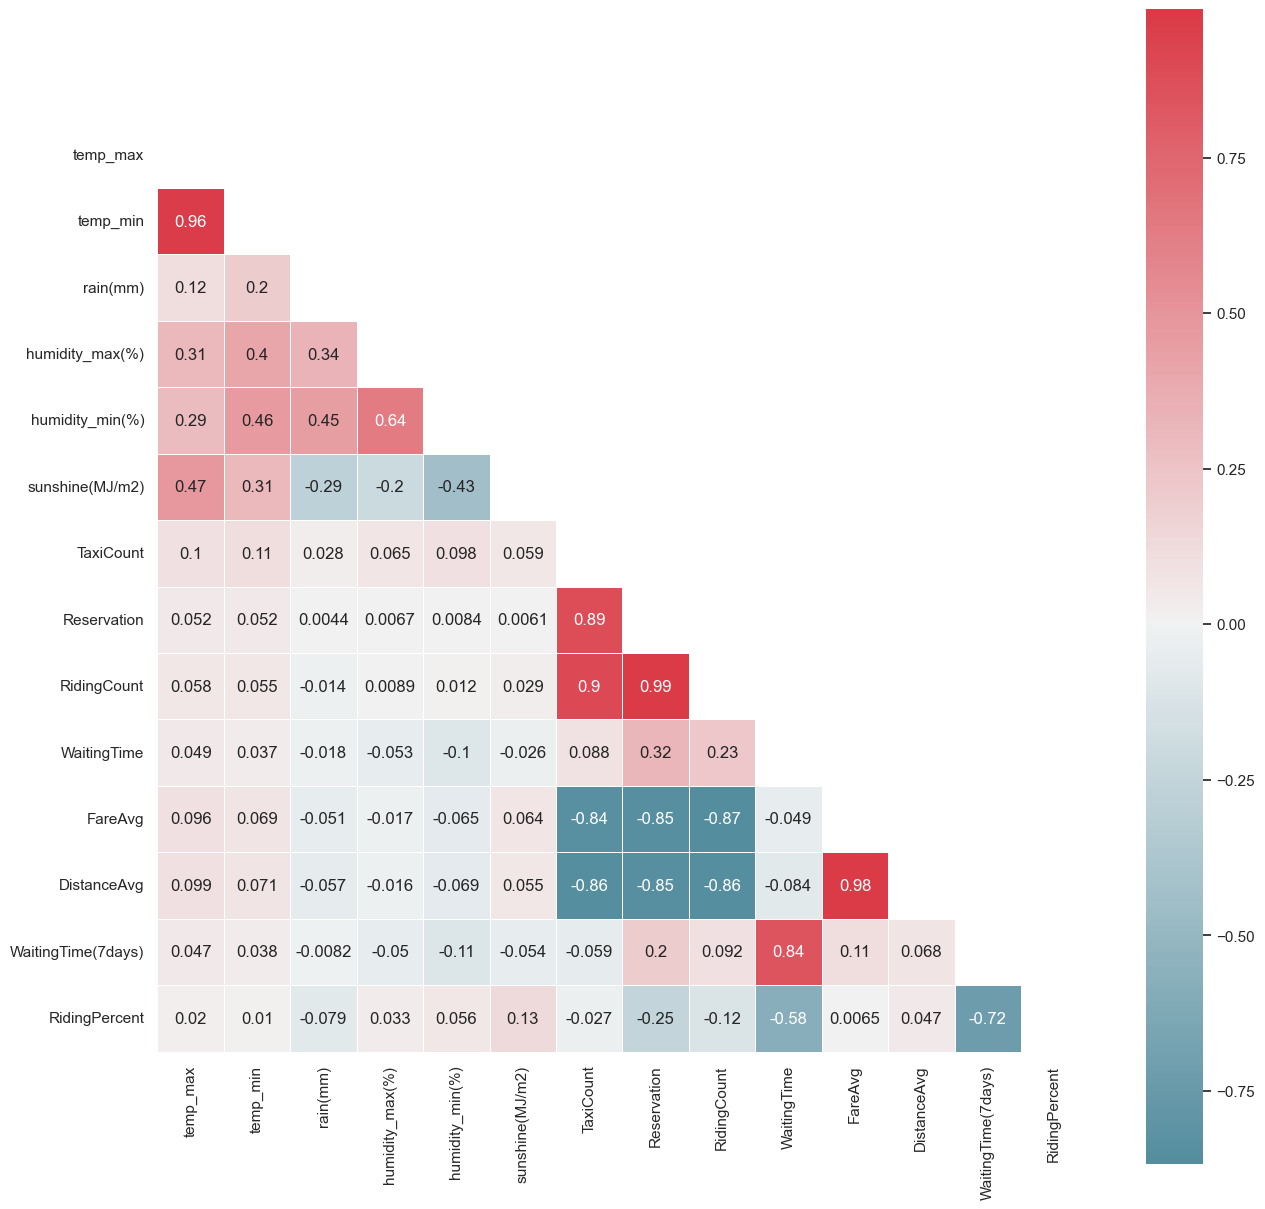

In [48]:
categorical = ['Year', 'Month', 'Day', 'holiday', 'Week']
num_vars = [x for x in list(data) if x not in categorical]

eda_2_corr(data, num_vars)
# data.corr(numeric_only=True)

In [49]:
temp = data.loc[:, num_vars]
target_corr = temp.corr(numeric_only=True)['WaitingTime']

In [50]:
target_corr

temp_max              0.048643
temp_min              0.037092
rain(mm)             -0.018052
humidity_max(%)      -0.052697
humidity_min(%)      -0.099942
sunshine(MJ/m2)      -0.026301
TaxiCount             0.088019
Reservation           0.316286
RidingCount           0.229459
WaitingTime           1.000000
FareAvg              -0.049121
DistanceAvg          -0.084166
WaitingTime(7days)    0.842277
RidingPercent        -0.584637
Name: WaitingTime, dtype: float64

In [51]:
target_corr = abs(target_corr)
target_corr = target_corr.sort_values(ascending=False)

#### 2) 산점도

In [52]:
def eda_2_nn(data, target, var, hue=''):

    plt.figure(figsize = (4,4))
    if hue == '' :
        sns.scatterplot(x = var, y = target, data = data)
        plt.grid()

    if hue != '' :
        sns.scatterplot(x = var, y = target, data = data, hue = hue)
        plt.grid()

    plt.show()

In [53]:
target_corr_keys = list(target_corr.keys())

In [54]:
target_corr_keys

['WaitingTime',
 'WaitingTime(7days)',
 'RidingPercent',
 'Reservation',
 'RidingCount',
 'humidity_min(%)',
 'TaxiCount',
 'DistanceAvg',
 'humidity_max(%)',
 'FareAvg',
 'temp_max',
 'temp_min',
 'sunshine(MJ/m2)',
 'rain(mm)']

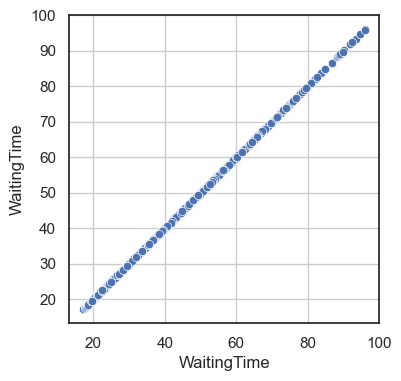

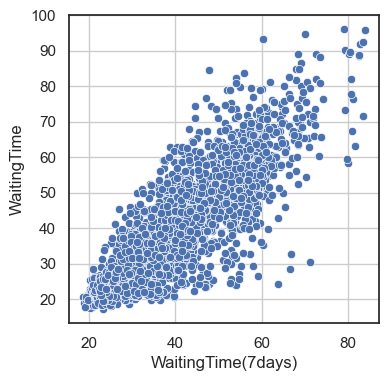

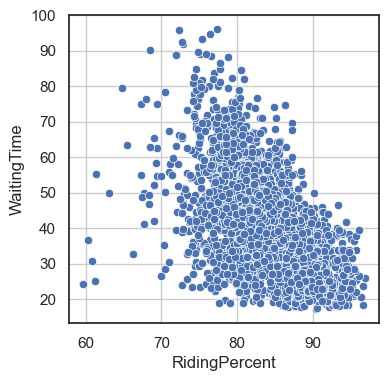

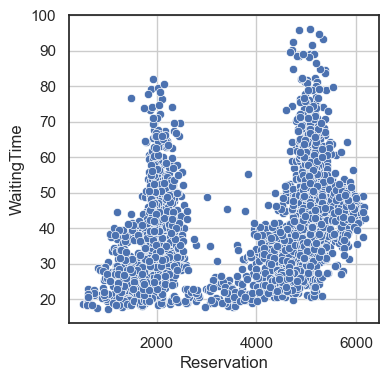

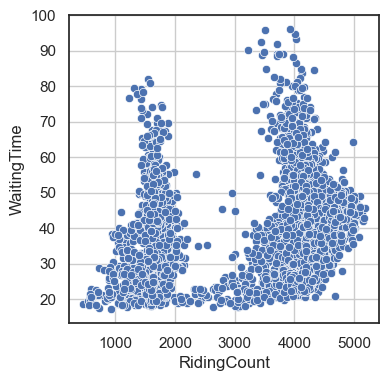

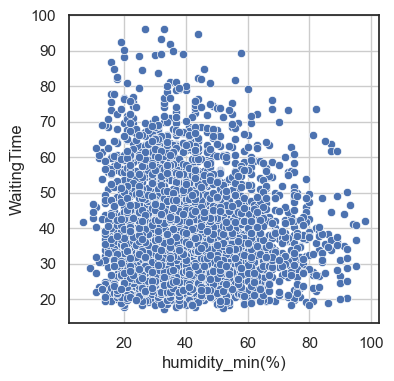

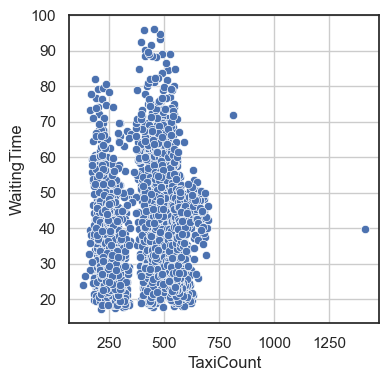

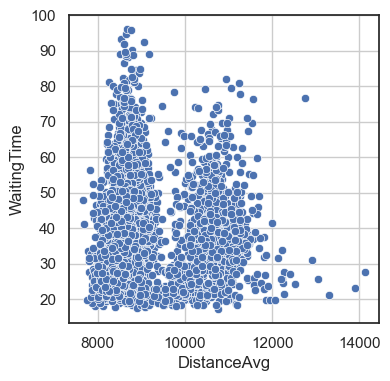

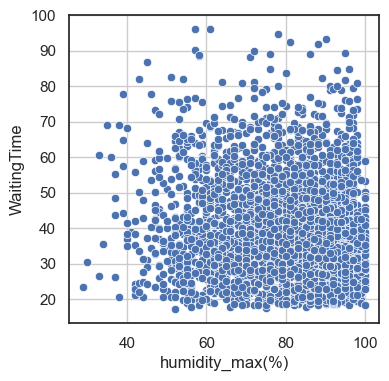

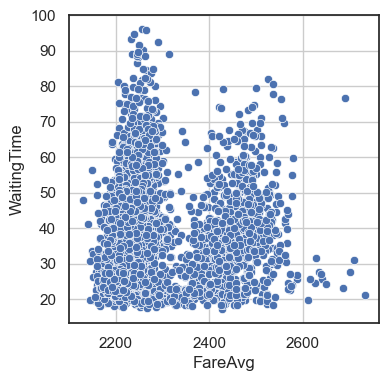

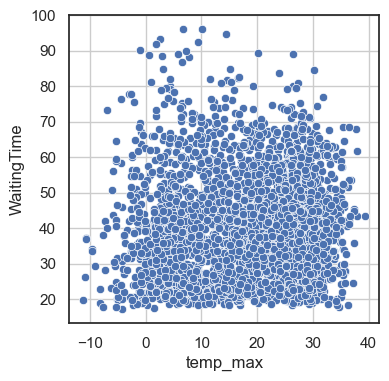

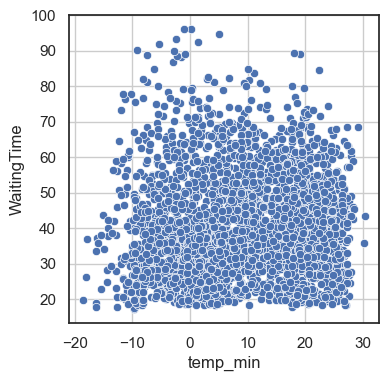

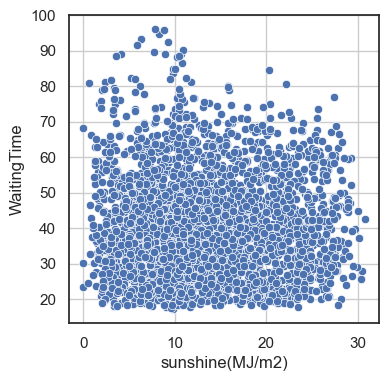

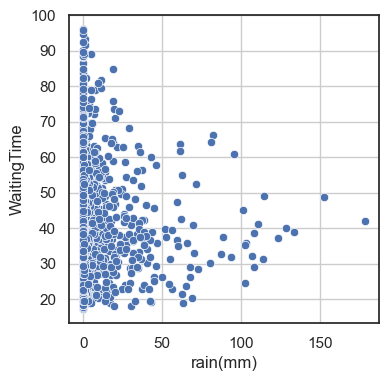

<Figure size 640x480 with 0 Axes>

In [55]:
target = 'WaitingTime'
drop_col = []
for key in target_corr_keys:
    if key in drop_col:
        continue
    eda_2_nn(data, target, key)
plt.tight_layout()
plt.show()


### p-value

In [81]:
p_value = []
for key in target_corr_keys:
    p_value.append([key, spst.pearsonr(data[key], data[target])[0], spst.pearsonr(data[key], data[target])[1]])
sorted(p_value, key=lambda x: (abs(x[2]), -abs(x[1]))) # p_value -> 상관계수 순으로 오름, 내림정렬

[['WaitingTime', 1.0, 0.0],
 ['WaitingTime(7days)', 0.8422765360460973, 0.0],
 ['RidingPercent', -0.5846374590756607, 1.5981497738565e-267],
 ['Reservation', 0.31628644458104893, 6.850444897204984e-69],
 ['RidingCount', 0.2294589853405473, 3.237341091754435e-36],
 ['humidity_min(%)', -0.09994222309631429, 6.174366591920646e-08],
 ['TaxiCount', 0.0880187597855018, 1.8874590262781044e-06],
 ['DistanceAvg', -0.0841662077387906, 5.218974012507502e-06],
 ['humidity_max(%)', -0.05269712739914023, 0.004381114135658824],
 ['FareAvg', -0.04912115386238354, 0.007913532517562872],
 ['temp_max', 0.0486429513729492, 0.008542202747881148],
 ['temp_min', 0.037092214464150154, 0.04497681981732815],
 ['sunshine(MJ/m2)', -0.02630115906253549, 0.15521196606937882],
 ['rain(mm)', -0.018051939089594952, 0.32932765247294715]]

* ride_rate

In [ ]:
eda_2_nn(data, target, 'RidingPercent')

* fare

In [ ]:
# eda_2_nn(data, 'target', 'fare', 'weekday')

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

* 휴일 여부

In [83]:
categorical = {}

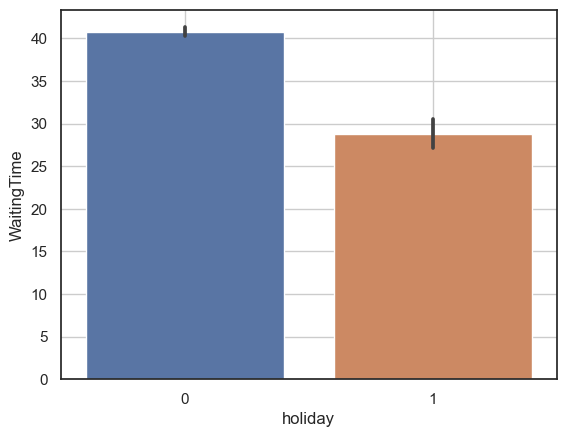

In [84]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

sns.barplot(x='holiday', y='WaitingTime', data=data)
plt.grid()
plt.show()

In [93]:
# t-test
h0 = data.loc[data['holiday']==0, target]
h1 = data.loc[data['holiday']==1, target]

categorical['holiday'] = spst.ttest_ind(h0, h1)[:2]
spst.ttest_ind(h0, h1)

TtestResult(statistic=9.268330788228974, pvalue=3.5647019726880736e-20, df=2920.0)

* 요일

In [94]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



In [95]:
# # anova
temp = data.loc[data['WeekDay'].notnull()]

w0 = temp.loc[temp['WeekDay']=='Monday', target]
w1 = temp.loc[temp['WeekDay']=='Tuesday', target]
w2 = temp.loc[temp['WeekDay']=='Wednesday', target]
w3 = temp.loc[temp['WeekDay']=='Thursday', target]
w4 = temp.loc[temp['WeekDay']=='Friday', target]
w5 = temp.loc[temp['WeekDay']=='Saturday', target]
w6 = temp.loc[temp['WeekDay']=='Sunday', target]


categorical['WeekDay'] = spst.f_oneway(w0,w1,w2,w3,w4,w5,w6)
spst.f_oneway(w0,w1,w2,w3,w4,w5,w6)

F_onewayResult(statistic=15.693225571800696, pvalue=8.18819424474285e-18)

* 계절

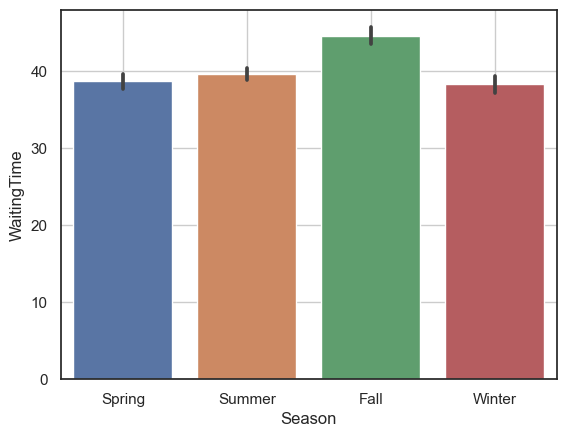

In [96]:
sns.barplot(x = 'Season', y = target, data = data)
plt.grid()
plt.show()

In [97]:
# anova
temp = data.loc[data['Season'].notnull()]

s0 = temp.loc[temp['Season']=='Spring', target]
s1 = temp.loc[temp['Season']=='Summer', target]
s2 = temp.loc[temp['Season']=='Fall', target]
s3 = temp.loc[temp['Season']=='Winter', target]

spst.f_oneway(s0,s1,s2,s3)
categorical['Season'] = spst.f_oneway(s0,s1,s2,s3)

- Month

In [98]:
temp = data.loc[data['Month'].notnull()]

m1 = temp.loc[temp['Month']==1, target]
m2 = temp.loc[temp['Month']==2, target]
m3 = temp.loc[temp['Month']==3, target]
m4 = temp.loc[temp['Month']==4, target]
m5 = temp.loc[temp['Month']==5, target]
m6 = temp.loc[temp['Month']==6, target]
m7 = temp.loc[temp['Month']==7, target]
m8 = temp.loc[temp['Month']==8, target]
m9 = temp.loc[temp['Month']==9, target]
m10 = temp.loc[temp['Month']==10, target]
m11 = temp.loc[temp['Month']==11, target]
m12 = temp.loc[temp['Month']==12, target]

spst.f_oneway(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12)
# temp
categorical['Month'] = spst.f_oneway(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12)
# temp

In [100]:
sorted(categorical.items(), key=lambda x:(abs(x[1][1]), -abs(x[1][0])))

[('Month',
  F_onewayResult(statistic=26.79616016699292, pvalue=7.940832241008408e-54)),
 ('Season',
  F_onewayResult(statistic=32.323232120766924, pvalue=1.5076055888918933e-20)),
 ('holiday', (9.268330788228974, 3.5647019726880736e-20)),
 ('WeekDay',
  F_onewayResult(statistic=15.693225571800696, pvalue=8.18819424474285e-18))]

## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

* 강한 관계의 변수

In [ ]:
# [['WaitingTime', 1.0, 0.0],
#  ['WaitingTime(7days)', 0.8422765360460973, 0.0],
#  ['RidingPercent', -0.5846374590756607, 1.5981497738565e-267],
#  ['Reservation', 0.31628644458104893, 6.850444897204984e-69],
#  ['RidingCount', 0.2294589853405473, 3.237341091754435e-36],
#  ['humidity_min(%)', -0.09994222309631429, 6.174366591920646e-08],
#  ['TaxiCount', 0.0880187597855018, 1.8874590262781044e-06],
#  ['DistanceAvg', -0.0841662077387906, 5.218974012507502e-06],
#  ['humidity_max(%)', -0.05269712739914023, 0.004381114135658824],
#  ['FareAvg', -0.04912115386238354, 0.007913532517562872],
#  ['temp_max', 0.0486429513729492, 0.008542202747881148],
#  ['temp_min', 0.037092214464150154, 0.04497681981732815],
#  ['sunshine(MJ/m2)', -0.02630115906253549, 0.15521196606937882],
#  ['rain(mm)', -0.018051939089594952, 0.32932765247294715]]

In [ ]:
# [('Month',
#   F_onewayResult(statistic=26.79616016699292, pvalue=7.940832241008408e-54)),
#  ('Season',
#   F_onewayResult(statistic=32.323232120766924, pvalue=1.5076055888918933e-20)),
#  ('holiday', (9.268330788228974, 3.5647019726880736e-20)),
#  ('WeekDay',
#   F_onewayResult(statistic=15.693225571800696, pvalue=8.18819424474285e-18))]

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 수치형: 
# 범주형: 

* 중간(약한) 관계의 변수

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 수치형 : humidity_min(%), humidity_max(%)

* (거의) 관계가 없는 변수

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

In [101]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

joblib.dump(data, 'data2.pkl')

['data2.pkl']